# 商品价格

## 大纲

在全球超过一半的国家中，[商品](https://baike.baidu.com/item/%E5%95%86%E5%93%81/1245866)占[总出口的大部分](https://unctad.org/publication/commodities-and-development-report-2019)。

商品的例子包括铜、钻石、铁矿石、锂、棉花和咖啡豆。

本讲将介绍商品价格理论。

相比本系列的其他讲座，这一讲内容较为高级。

我们需要计算一个由价格函数描述的均衡。

我们将解一个方程，其中价格函数是未知量。

这比解一个未知数或向量的方程要难得多。

本讲将讨论一种解[函数方程](https://baike.baidu.com/item/%E5%87%BD%E6%95%B0%E6%96%B9%E7%A8%8B/6162392)的方法，这类方程的未知对象是函数。

本讲需要使用`yfinance`库。

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.5 MB/s eta 0:00:00


  Installing build dependencies ... -

 \

 |

 done


  Getting requirements to build wheel ... -

 done


  Preparing metadata (pyproject.toml) ... -

 done


 \

 |

 done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303841 sha256=f04a409757ae180f6fcc239174062d807d4aa74c6a1f13e1dd79cba1fa6b7752
  Stored in directory: /home/runner/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


我们将使用以下导入

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from scipy.stats import beta

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 数据

下图显示了自 2016 年初以来以美元计价的棉花价格。

In [3]:
s = yf.download('CT=F', '2016-1-1', '2023-4-1', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed

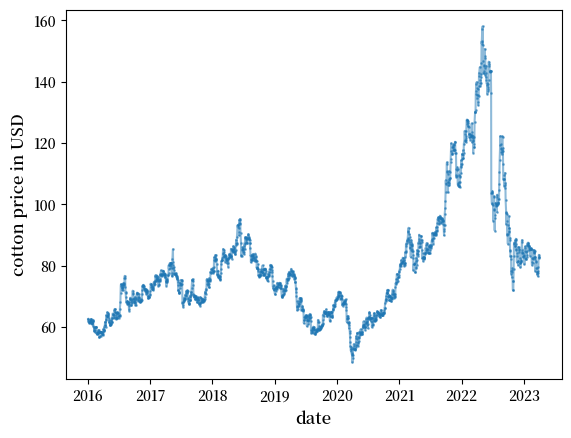

In [4]:
fig, ax = plt.subplots()

ax.plot(s, marker='o', alpha=0.5, ms=1)
ax.set_ylabel('cotton price in USD', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

该图显示了棉花价格的巨大波动，令人惊讶。

是什么导致了这些波动？

一般来说，价格取决于以下各方的选择和行为：

1. 供应商，
2. 消费者，以及
3. 投机者。

我们的重点将是这些方之间的互动。

我们将通过一个动态的供需模型将它们联系在一起，称为 *竞争性储存模型*。

该模型由 {cite}`samuelson1971stochastic`、{cite}`wright1982economic`、{cite}`scheinkman1983simple`、{cite}`deaton1992on`、{cite}`deaton1996competitive` 和 {cite}`chambers1996theory` 开发。

## 竞争性储存模型

在竞争性储存模型中，商品被视为一种资产。这些商品具有两个特点：

1. 可以被投机者交易，并且
2. 对消费者有内在价值。

总需求是消费者需求和投机者需求的总和。

供应是外生的，取决于“收成”。

```{note}
如今，基本的计算机芯片和集成电路等高度标准化的产品，在金融市场上也被视为商品。对这类商品来说，"收成"一词并不太恰当。

不过为了简化问题，我们还是沿用这个术语。
```

均衡价格是通过竞争决定的。

它是当前状态的一个函数（决定当前的收成并预测未来的收成）。

## 模型

考虑一个单一商品的市场，其价格在时间 $t$ 为 $p_t$。

该商品在时间 $t$ 的收成为 $Z_t$。

我们假设序列 $\{ Z_t \}_{t \geq 1}$ 是独立同分布（IID）的，具有共同的密度函数 $\phi$，其中 $\phi$ 为非负。

投机者可以在各期之间储存该商品，当前期购买的 $I_t$ 单位在下一期将产生 $\alpha I_t$ 单位。

这里的参数 $\alpha \in (0,1)$ 是该商品的贬值率。

为了简化问题，风险自由利率取为零，因此购买 $I_t$ 单位的预期利润为

$$
  \mathbb{E}_t \, p_{t+1} \cdot \alpha I_t - p_t I_t
   = (\alpha \mathbb{E}_t \, p_{t+1} - p_t) I_t
$$

其中 $\mathbb{E}_t \, p_{t+1}$ 是在时间 $t$ 对 $p_{t+1}$ 的期望。


## 均衡

在本节中，我们定义均衡并讨论如何计算它。

### 均衡条件

假设投机者是风险中性的，这意味着他们在预期利润为正时会购买商品。

因此，如果预期利润为正，则市场不处于均衡状态。

所以要达到均衡，价格必须满足“无套利”条件：

$$
  \alpha \mathbb{E}_t \, p_{t+1}  - p_t \leq 0
$$ (eq:arbi)

这表明当预期价格低于当前价格时，就不存在套利空间。

利润最大化给出了额外条件：

$$
  \alpha \mathbb{E}_t \, p_{t+1}  - p_t  < 0 \text{ 意味着 } I_t = 0
$$ (eq:pmco)

我们还要求市场出清，即每期供应等于需求。

假设消费者根据价格 $p$ 产生需求量 $D(p)$。

令 $P := D^{-1}$ 为逆需求函数。

关于数量：

* 供应是投机者的持有量和当前收成的总和，并且
* 需求是消费者购买和投机者购买的总和。

用数学语言表述：

* 供应由 $X_t = \alpha I_{t-1} + Z_t$ 给出，取值在 $S := \mathbb R_+$ 中。
* 需求为 $D(p_t) + I_t$。

因此，市场均衡条件为：

$$
  \alpha I_{t-1} + Z_t =  D(p_t) + I_t
$$ (eq:mkeq)

初始条件 $X_0 \in S$ 为给定值。



### 一个均衡函数

如何找到均衡呢？

我们的思路是寻找一个只依赖当前状态的价格系统。

（我们的解法使用了 [拟设（ansatz）](https://baike.baidu.com/item/%E6%8B%9F%E8%AE%BE/18875444)，这是一种基于推测的猜想——在这里是对价格函数的猜想。）

具体来说，我们在 $S$ 上取一个函数 $p$，对每个 $t$ 令 $p_t = p(X_t)$。

价格和数量随后满足：

$$
  p_t = p(X_t)，\quad I_t = X_t - D(p_t)，\quad X_{t+1} = \alpha I_t + Z_{t+1}
$$ (eq:eosy)

我们选择 $p$ 使这些价格和数量满足上述均衡条件。

更准确地说，我们要找一个 $p$，使得 [](eq:arbi) 和 [](eq:pmco) 对应的系统 [](eq:eosy) 成立。

$$
  p^*(x) = \max
    \left\{
    \alpha \int_0^\infty p^*(\alpha I(x) + z) \phi(z)dz, P(x)
    \right\}
    \qquad (x \in S)
$$ (eq:dopf)

其中

$$
  I(x) := x - D(p^*(x))
    \qquad (x \in S)
$$ (eq:einvf)

事实证明，这样的 $p^*$ 是充分的，因为它满足 [](eq:arbi) 和 [](eq:pmco) 对应的系统 [](eq:eosy)。

要理解这一点，我们首先注意到：

$$
  \mathbb{E}_t \, p_{t+1}
   = \mathbb{E}_t \, p^*(X_{t+1})
   = \mathbb{E}_t \, p^*(\alpha I(X_t) + Z_{t+1})
   = \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz
$$

因此，条件 [](eq:arbi) 要求：

$$
   \alpha \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz \leq p^*(X_t)
$$

这个不等式直接来自 [](eq:dopf)。

其次，对于 [](eq:pmco)，假设：

$$
   \alpha \int_0^\infty p^*(\alpha I(X_t) + z) \phi(z)dz < p^*(X_t)
$$

那么根据 [](eq:dopf)，我们得到 $p^*(X_t) = P(X_t)$。

此时有 $D(p^*(X_t)) = X_t$，并且 $I_t = I(X_t) = 0$。

因此，条件 [](eq:arbi) 和 [](eq:pmco) 都成立。

我们找到了一个均衡，验证了 ansatz。


### 计算均衡

现在我们知道，均衡可以通过找到一个满足 [](eq:dopf) 的函数 $p^*$ 来获得。

在温和的条件下，可以证明在 $S$ 上恰好存在一个满足 [](eq:dopf) 的函数。

此外，我们可以通过逐次逼近来计算这个函数。

具体来说，我们从一个初始函数猜测开始，然后使用 [](eq:dopf) 来更新它。

这会生成一系列函数 $p_1, p_2, \ldots$。

我们继续这个过程，直到它收敛，即 $p_k$ 和 $p_{k+1}$ 非常接近。

然后，我们将最终计算得到的 $p_k$ 作为 $p^*$ 的近似值。

为了实现更新步骤，将 [](eq:dopf) 和 [](eq:einvf) 结合起来是很有帮助的。

这给出了更新规则：

$$
  p_{k+1}(x) = \max
    \left\{
    \alpha \int_0^\infty p_k(\alpha ( x - D(p_{k+1}(x))) + z) \phi(z)dz, P(x)
    \right\}
$$ (eq:dopf2)

换句话说，我们将 $p_k$ 视为给定，并在每个 $x$ 处求解 $q$

$$
  q = \max
    \left\{
    \alpha \int_0^\infty p_k(\alpha ( x - D(q)) + z) \phi(z)dz, P(x)
    \right\}
$$ (eq:dopf3)

实际上，我们无法对每个 $x$ 进行这样的计算，所以我们选择一系列离散点 $x_1, \ldots, x_n$ 来进行计算。

对这些点，我们可以得到相应的值 $q_1, \ldots, q_n$。

然后，我们在网格点 $x_1, \ldots, x_n$ 上对这些值 $q_1, \ldots, q_n$ 进行线性插值，从而得到 $p_{k+1}$。

我们不断重复这个过程，直到结果收敛。

## 代码

下面的代码实现了这个迭代过程。我们从 $p_0 = P$ 开始。

我们选择一个偏移的贝塔分布作为分布 $\phi$（当然也可以选择其他分布）。

[](eq:dopf3) 中的积分通过 {ref}`Monte Carlo <monte-carlo>` 方法来计算。

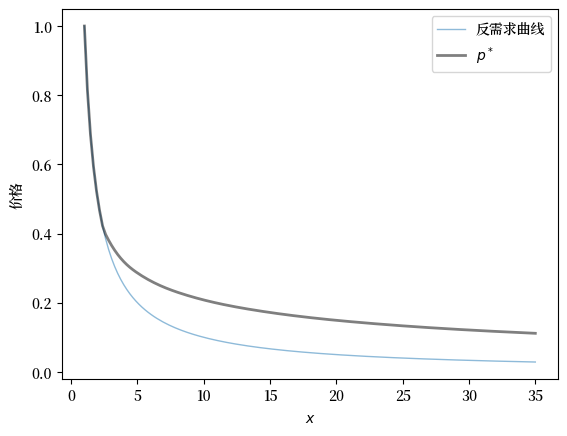

In [5]:
α, a, c = 0.8, 1.0, 2.0
beta_a, beta_b = 5, 5
mc_draw_size = 250
gridsize = 150
grid_max = 35
grid = np.linspace(a, grid_max, gridsize)

beta_dist = beta(5, 5)
Z = a + beta_dist.rvs(mc_draw_size) * c    # 随机冲击的观测值
D = P = lambda x: 1.0 / x
tol = 1e-4


def T(p_array):

    new_p = np.empty_like(p_array)

    # 插值以获得p 作为函数。

    p = interp1d(grid,
                 p_array,
                 fill_value=(p_array[0], p_array[-1]),
                 bounds_error=False)

    # 更新
    for i, x in enumerate(grid):

        h = lambda q: q - max(α * np.mean(p(α * (x - D(q)) + Z)), P(x))
        new_p[i] = brentq(h, 1e-8, 100)

    return new_p


fig, ax = plt.subplots()

price = P(grid)
ax.plot(grid, price, alpha=0.5, lw=1, label="反需求曲线")
error = tol + 1
while error > tol:
    new_price = T(price)
    error = max(np.abs(new_price - price))
    price = new_price

ax.plot(grid, price, 'k-', alpha=0.5, lw=2, label=r'$p^*$')
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel("价格")

plt.show()

上图显示了逆需求曲线 $P$，也就是 $p_0$，以及我们对 $p^*$ 的近似。

一旦我们得到了 $p^*$ 的近似值，就可以模拟价格的时间序列。

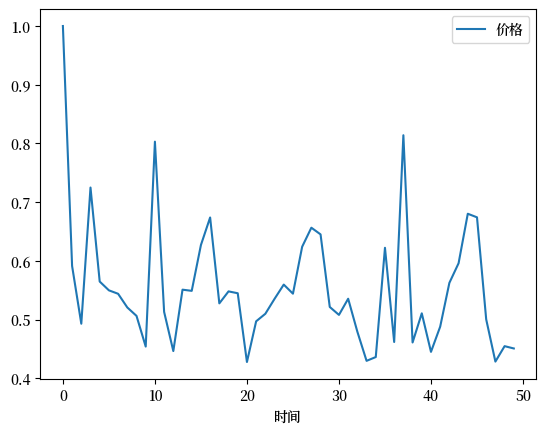

In [6]:
# 将价格数组转化为价格函数。
p_star = interp1d(grid,
                  price,
                  fill_value=(price[0], price[-1]),
                  bounds_error=False)

def carry_over(x):
    return α * (x - D(p_star(x)))

def generate_cp_ts(init=1, n=50):
    X = np.empty(n)
    X[0] = init
    for t in range(n-1):
            Z = a + c * beta_dist.rvs()
            X[t+1] = carry_over(X[t]) + Z
    return p_star(X)

fig, ax = plt.subplots()
ax.plot(generate_cp_ts(), label="价格")
ax.set_xlabel("时间")
ax.legend()
plt.show()